# Importing libraries

In [9]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Lambda
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set random seed

In [ ]:
# Set environment variables
os.environ['PYTHONHASHSEED'] = str(25)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed values
np.random.seed(25)
tf.random.set_seed(25)
random.seed(25)

# TODO: Preprocess

In [1]:
# Preprocess the text
def preprocess(text):
    lower_text = text.lower()
    words = lower_text.split()
    # print(words)
    return words


# TODO: Build Vocabulary and training data

In [43]:
# TODO: Build vocabulary and generate training data
def build_and_prepare_data(words, window_size=2):
    # Build vocabulary
    vocab = {}
    index = 0
    for word in words:
        if word not in vocab:
            vocab[word] = index
            index += 1
    # Generate context-target pairs
    contexts = []
    targets = []
    for i in range(window_size, len(words) - window_size):
        context = []
        for j in range(-window_size, window_size + 1):
            if j != 0:  # Skip the target word itself
                context.append(vocab[words[i + j]])
        contexts.append(context)
        targets.append(vocab[words[i]])

    # Extract contexts and targets from data
    contexts = np.array(contexts)
    targets = np.array(targets)

    # Prepare contexts and targets for training by padding and one-hot encoding
    targets = to_categorical(targets, num_classes=len(vocab))

    return vocab, contexts, targets

# TODO: Build CBOW model

In [44]:
from tensorflow.keras.models import Sequential
# Define CBOW model function
def build_cbow_model(vocab_size, embedded_size, window_size):
    # input_layer = Input(shape=(2*window_size,))
    # embedding_layer = Embedding(vocab_size, embed_size)(input_layer)
    # flatten_layer = Lambda(lambda x: K.sum(x, axis=1))(embedding_layer)
    # output_layer = Dense(vocab_size, activation='softmax')(flatten_layer)
    # model = Model(inputs=input_layer, outputs=output_layer)
    # model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=2*window_size, name='embedding'))
    model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 2)              56        
                                                                 
 lambda_2 (Lambda)           (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 28)                84        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TODO: Set file path

In [25]:
# TODO: set correct file path
file_path = './drive/MyDrive/Colab Notebooks/A3/small_corpus.txt'

# Running the helper functions

In [45]:
# Read the file
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

words = preprocess(text)

# Print vocabulary size
print(f"Number of words: {len(words)}")

# Model parameters
window_size = 2

# Prepare dataset
vocab, contexts, targets = build_and_prepare_data(words, window_size)

vocab_size = len(vocab)
# Print vocabulary size
print(f"Vocabulary size: {vocab_size}")

# Print lengths of contexts and targets
print(f"Length of contexts array: {len(contexts)}")
print(f"Length of targets array: {len(targets)}")

Number of words: 280000
Vocabulary size: 28
Length of contexts array: 279996
Length of targets array: 279996


# Split the data inton training and validation sets

In [12]:
# Splitting the data
contexts_train, contexts_val, targets_train, targets_val = train_test_split(contexts, targets, test_size=0.2, random_state=25)

embed_size = 2

# Train the model

In [26]:
# Create and train the model
model = build_cbow_model(vocab_size, embed_size, window_size)
history = model.fit(contexts_train, targets_train, validation_data=(contexts_val, targets_val), epochs=7, verbose=1)


Epoch 1/7
7000/7000 [==============================] - 30s 4ms/step - loss: 2.3523 - accuracy: 0.1193 - val_loss: 2.2201 - val_accuracy: 0.1385
Epoch 2/7
7000/7000 [==============================] - 27s 4ms/step - loss: 2.2114 - accuracy: 0.1406 - val_loss: 2.2073 - val_accuracy: 0.1422
Epoch 3/7
7000/7000 [==============================] - 28s 4ms/step - loss: 2.2040 - accuracy: 0.1447 - val_loss: 2.2015 - val_accuracy: 0.1469
Epoch 4/7
7000/7000 [==============================] - 27s 4ms/step - loss: 2.1976 - accuracy: 0.1492 - val_loss: 2.1953 - val_accuracy: 0.1474
Epoch 5/7
7000/7000 [==============================] - 29s 4ms/step - loss: 2.1919 - accuracy: 0.1512 - val_loss: 2.1900 - val_accuracy: 0.1531
Epoch 6/7
7000/7000 [==============================] - 29s 4ms/step - loss: 2.1874 - accuracy: 0.1536 - val_loss: 2.1868 - val_accuracy: 0.1484
Epoch 7/7
7000/7000 [==============================] - 27s 4ms/step - loss: 2.1835 - accuracy: 0.1546 - val_loss: 2.1831 - val_accuracy:

# TODO: Visualise the Training and Validation loss

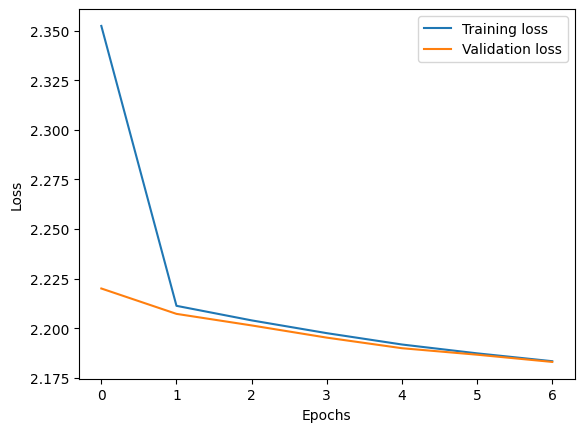

In [27]:
# Plotting the training and validation loss
#TODO
def plot_history(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# def virtualize_train_loss(embeddings, vocabulary):
#   plt.figure(figsize=(10, 10))
#   for word, i in vocabulary.items():
#     x = embeddings[i, 0]
#     y = embeddings[i, 1]
#     plt.scatter(x, y)
#     plt.text(x, y, word, fontsize=13)
#   plt.xlable('Embedding Dim 1')
#   plt.ylable('Embedding Dim 2')
#   plt.show()
plot_history(history)

# TODO: Extract the embeddings

In [39]:
# Extract embeddings
#TODO
def extrac_embeddings(model, vocab):
    weights = model.get_layer('embedding').get_weights()[0]
    embeddings = {}
    for word, index in vocab.items():
        embeddings[word] = weights[index]

    print(embeddings)
    return embeddings

# TODO: Find similar words

In [50]:
def cosine_similarity(vec_a, vec_b):
    """Calculate the cosine similarity between two vectors."""
    #TODO
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

def find_similar_words(query_word, vocab, embeddings, top_n=3):
    """Find the top_n words most similar to the query_word based on the embeddings."""
    # similarities = []

    # #TODO populate the similarities list
    # query_vec = embeddings[vocab[query_word]]

    # for word, index in vocab.items():
    #     if word != query_word:
    #         similarity = cosine_similarity(query_vec, embeddings[index])
    #         similarities.append((word, similarity))

    # # Sort based on similarity scores
    # similarities.sort(key=lambda x: x[1], reverse=True)

    # # Print top similar words
    # print(f"Words most similar to '{query_word}':")
    # for word, similarity in similarities[:top_n]:
    #     print(f"{word}: {similarity:.4f}")

    # similarities = []
    # query_vec = embeddings[vocab[query_word]]

    # for word, index in vocab.items():
    #     if word != query_word:
    #         similarity = cosine_similarity(query_vec, embeddings[index])
    #         similarities.append((word, similarity))

    # similarities.sort(key=lambda x: x[1], reverse=True)

    similarities = []
    query_vec = embeddings[query_word]
    for word, index in vocab.items():
        if word != query_word:
            similarity = cosine_similarity(query_vec, embeddings[word])
            similarities.append((word, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    print(f"Words most similar to '{query_word}':")
    for word, similarity in similarities[:top_n]:
        print(f"{word}: {similarity:.4f}")
    return similarities[:top_n]

In [51]:
query_words = ['poland', 'thailand', 'morocco']
embeddings = extrac_embeddings(model, vocab)
print("Vocabulary:", vocab)
print("Embeddings:", embeddings)
for query_word in query_words:
    find_similar_words(query_word, vocab, embeddings)
    print("\n")


{'morocco': array([-5.524102 ,  3.5444305], dtype=float32), 'algeria': array([-4.277616 ,  1.7736688], dtype=float32), 'kenya': array([-1.6352816 , -0.54409516], dtype=float32), 'nigeria': array([-3.8293767,  2.7293139], dtype=float32), 'ghana': array([-4.9332867,  3.788389 ], dtype=float32), 'egypt': array([-3.43803  ,  3.9202158], dtype=float32), 'tanzania': array([-0.8437194,  5.6399994], dtype=float32), 'uganda': array([-1.8313838,  1.2413297], dtype=float32), 'ethiopia': array([-0.9581129,  3.7414114], dtype=float32), 'indonesia': array([2.3401127, 4.124697 ], dtype=float32), 'bangladesh': array([2.6239586, 0.5656247], dtype=float32), 'india': array([1.9228671, 0.8357332], dtype=float32), 'thailand': array([3.5127878, 1.5937853], dtype=float32), 'japan': array([ 9.861819  , -0.66126984], dtype=float32), 'vietnam': array([ 1.3091505, -0.5457049], dtype=float32), 'malaysia': array([3.4494581 , 0.33882716], dtype=float32), 'china': array([7.59847 , 2.964832], dtype=float32), 'philipp

# TODO: Visualise the embeddings

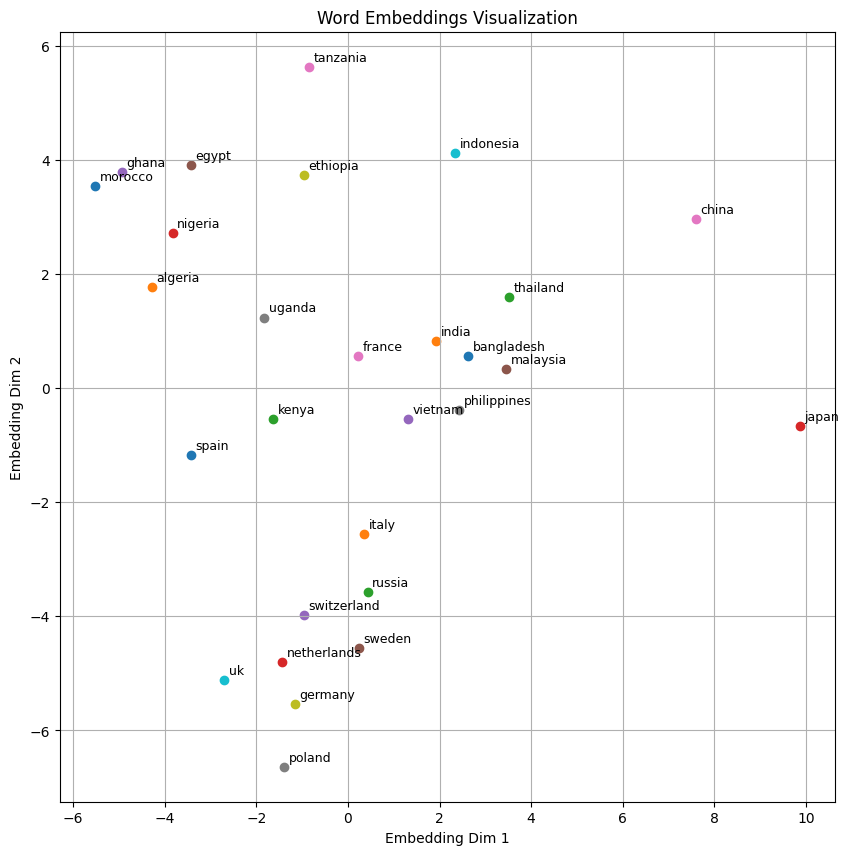

In [52]:
# Create a scatter plot of the embeddings
# TODO
def visualize_embeddings(embeddings, vocab):
    plt.figure(figsize=(10, 10))
    for word, index in vocab.items():
        x = embeddings[word][0]
        y = embeddings[word][1]
        plt.scatter(x, y)
        plt.text(x+0.1, y+0.1, word, fontsize=9)
    plt.xlabel('Embedding Dim 1')
    plt.ylabel('Embedding Dim 2')
    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()


visualize_embeddings(embeddings, vocab)